#<font color = 'shade'> **Classification on the ‘credit-g’ dataset using KNN Classification**</font>


# <font color = 'shade'>**Import/Install the packages**

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, feature-engine, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip show feature_engine

Name: feature-engine
Version: 1.6.2
Summary: Feature engineering package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 


In [ ]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler

# creating pipelines
from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper

from feature_engine.encoding import DecisionTreeEncoder

# <font color = 'shade'> **Specify Project Folder Location**

In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/AML/data')

In [ ]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2023'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

# <font color = 'shade'> **Import Custom Functions from Python file**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/AML/data/custom-functions']

In [ ]:
!cp /content/drive/MyDrive/plot_learning_curve.py .
from  plot_learning_curve import plot_learning_curve

In [ ]:
!cp /content/drive/MyDrive/eda_plots.py .
from eda_plots import diagnostic_plots, plot_target_by_category

#<font color = 'shade'>**Download Data** </font>
You can download the dataset using the commands below  and see it’s description at https://www.openml.org/d/31

### Attribute description from https://www.openml.org/d/31

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

In [ ]:
# Load data from  https://www.openml.org/d/31
X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


# <font color = 'shade'>**Exploratory data analysis**

## <font color = 'shade'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'shade'>**Check few rows**

In [ ]:
# check the top 5 rows
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


###  <font color = 'shade'>**Check column names**

In [ ]:
# Let's check the columns of the data
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

### <font color = 'shade'>**Check data types of columns**

In [ ]:
# check the data type for the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

### <font color = 'shade'>**Check for unnecessary columns**

Columns such as RowNumber, CustomerId, and Surname are unnecessary columns.

We don't need these columns for our analysis as these columns doesn't contain any pattern.

So, we can drop these columns.

### <font color = 'shade'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [ ]:
# Identify Columns that Contain a Single value
# we will use nunique() function to get number of unique values for each column
# We can delete the columns which have single values
X.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'shade'>**Check summary statistics**

In [ ]:
# We will use describe function and then take the transpose for better visualization
X.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### <font color = 'shade'>**Check for duplicate rows**

In [ ]:
# To check the duplicates of the data
dups = X.duplicated()
# report if there are any duplicates
print(dups.any())


False


From the given results, we can check that there are no duplicates in our data.

## <font color = 'shade'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [ ]:
# check missing values in data
X.isna()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# calculate % of mssing values for each column
X.isna().mean()*100

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
dtype: float64

<font color ='indianred'>**There are no missing values in the dataset.**

## <font color = 'shade'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [ ]:
# Create a list of categorical variables
# Since the dtype of categorical variable is Object we can compare the values with 'O'
categorical = [var for var in X.columns if X[var].dtype.name == 'category']

# Create a list of discrete variables
# we do not want to consider Exited as this is target variable
discrete = [
    var for var in X.columns if X[var].dtype.name != 'category'
    and len(X[var].unique()) < 20
]

# Create a list of continuous Variables
continuous = [
    var for var in X.columns if X[var].dtype.name != 'category'
    if var not in discrete
]

In [ ]:
# check continous Variables
continuous

['duration', 'credit_amount', 'age']

In [ ]:
# check categorical variables
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [ ]:
# check discrete variables
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

### <font color = 'shade'>**Check unique values for variables**

In [ ]:
# Check number of unique values for discrete variables
total_unique_values= X[discrete].nunique()
for key, value in total_unique_values.items():
    if value > 0:
        print(key,":",value)

installment_commitment : 4
residence_since : 4
existing_credits : 4
num_dependents : 2


In [ ]:
# check values for discrete variables
for var in discrete:
    print(var, X[var].unique(), '\n')

installment_commitment [4. 2. 3. 1.] 

residence_since [4. 2. 3. 1.] 

existing_credits [2. 1. 3. 4.] 

num_dependents [1. 2.] 



In [ ]:
# Check number of unique values for continuous variables
total_unique_values= X[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

duration : 33
credit_amount : 921
age : 53


In [ ]:
# check values for continuous variables
# we will check the first 20 values
for var in continuous:
    print(var, X[var].unique()[0:20], '\n')

duration [ 6. 48. 12. 42. 24. 36. 30. 15.  9. 10.  7. 60. 18. 45. 11. 27.  8. 54.
 20. 14.] 

credit_amount [ 1169.  5951.  2096.  7882.  4870.  9055.  2835.  6948.  3059.  5234.
  1295.  4308.  1567.  1199.  1403.  1282.  2424.  8072. 12579.  3430.] 

age [67. 22. 49. 45. 53. 35. 61. 28. 25. 24. 60. 32. 44. 31. 48. 26. 36. 39.
 42. 34.] 



In [ ]:
# Check number of unique values for categorical variables
total_unique_values= X[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

checking_status : 4
credit_history : 5
purpose : 10
savings_status : 5
employment : 5
personal_status : 4
other_parties : 3
property_magnitude : 4
other_payment_plans : 3
housing : 3
job : 4
own_telephone : 2
foreign_worker : 2


In [ ]:
# check values for categorical variables
for var in categorical:
    print(var, X[var].unique(), '\n')

checking_status ['<0', '0<=X<200', 'no checking', '>=200']
Categories (4, object): ['0<=X<200', '<0', '>=200', 'no checking'] 

credit_history ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
Categories (5, object): ['all paid', 'critical/other existing credit', 'delayed previously',
                         'existing paid', 'no credits/all paid'] 

purpose ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
Categories (10, object): ['business', 'domestic appliance', 'education', 'furniture/equipment',
                          ..., 'radio/tv', 'repairs', 'retraining', 'used car'] 

savings_status ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
Categories (5, object): ['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings'] 

employment ['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
Categories (5, object): ['

## <font color = 'shade'>**Check Variable Distributions**

### <font color = 'shade'>**Categorical Varibles**




#### <font color = 'shade'>**Frequency distribution of categorical variables and rare categories**

In [ ]:
def check_rare(var):
  cat_freq = 100 * X[var].value_counts(normalize=True)
  fig = cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='red')
  fig.set_ylabel('category percentage frequency')
  fig.set_xlabel(var)
  fig.set_title('Identifying Rare Categories')
  plt.show()

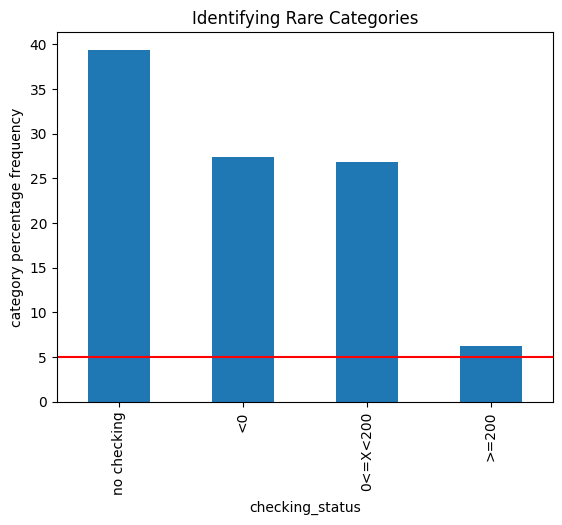

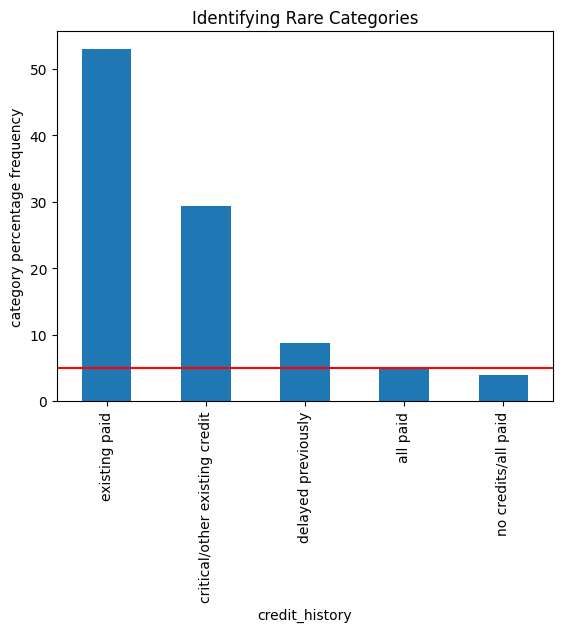

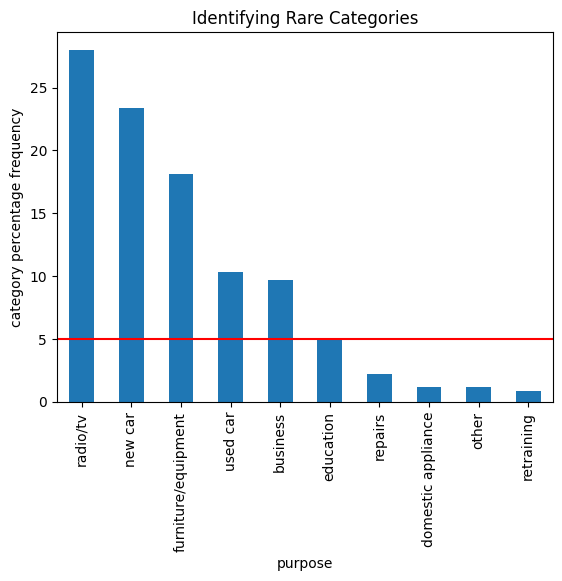

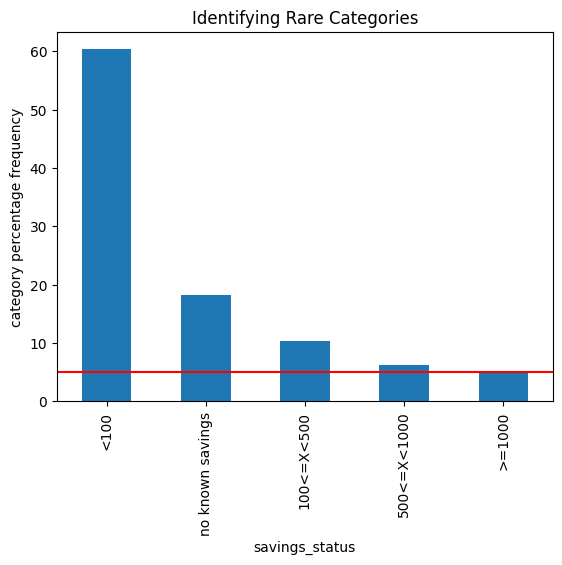

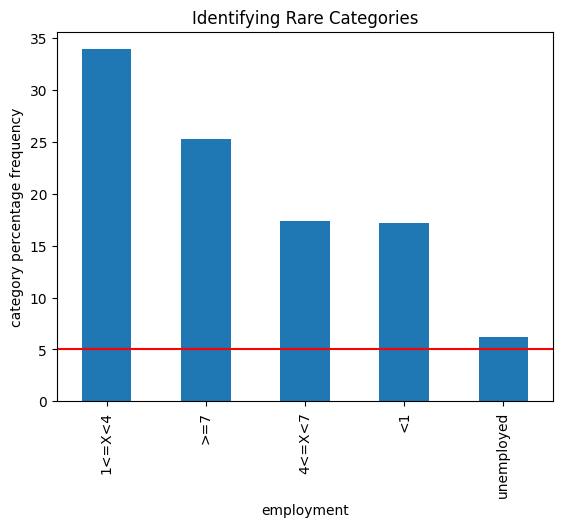

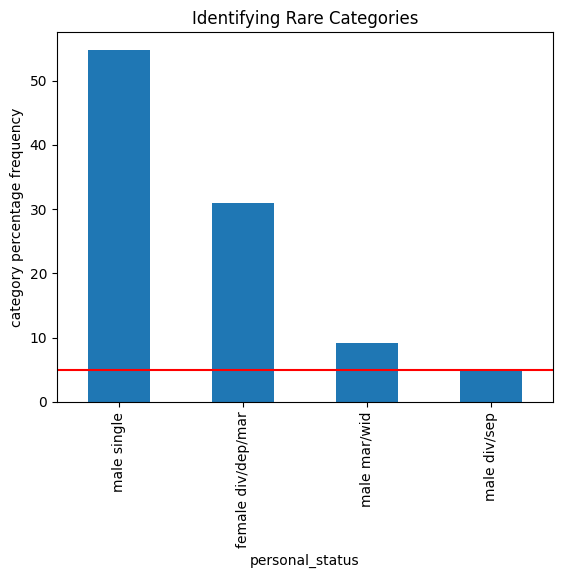

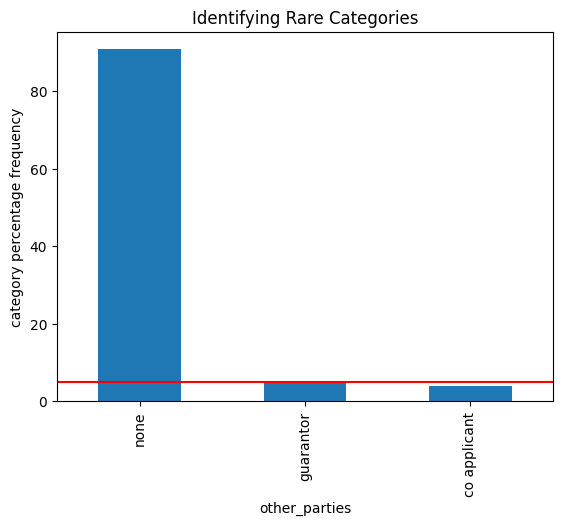

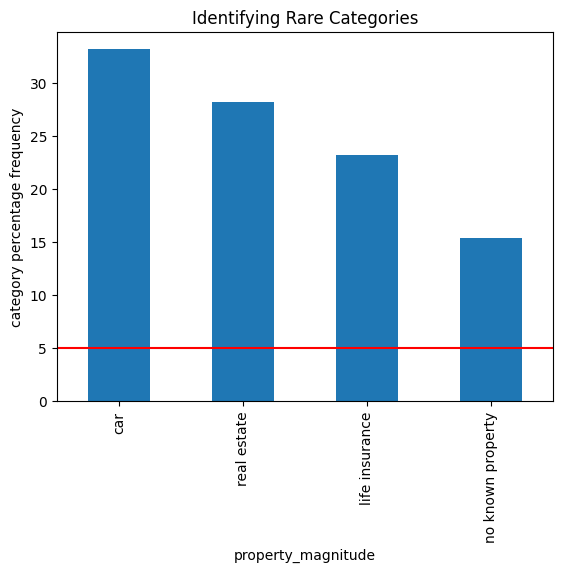

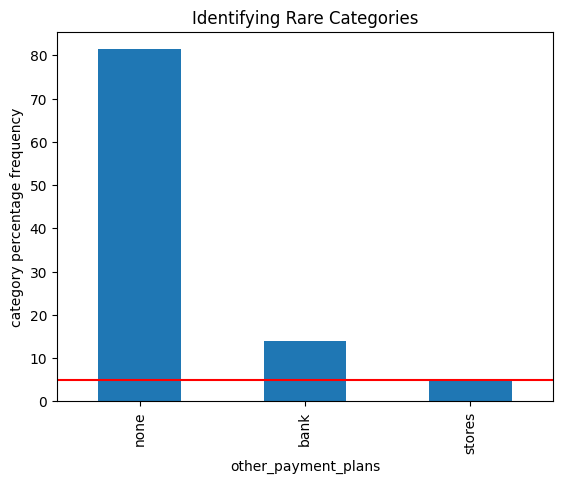

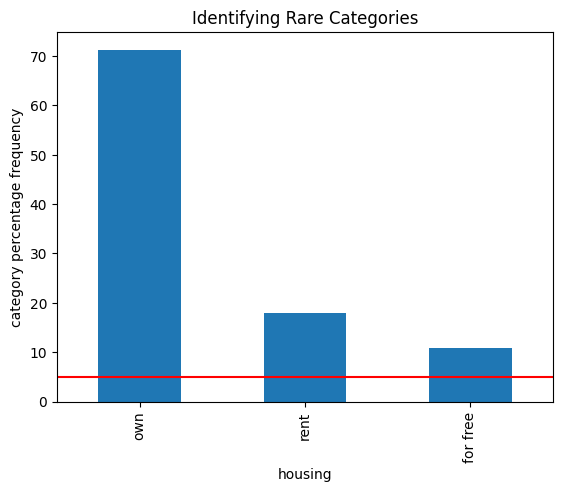

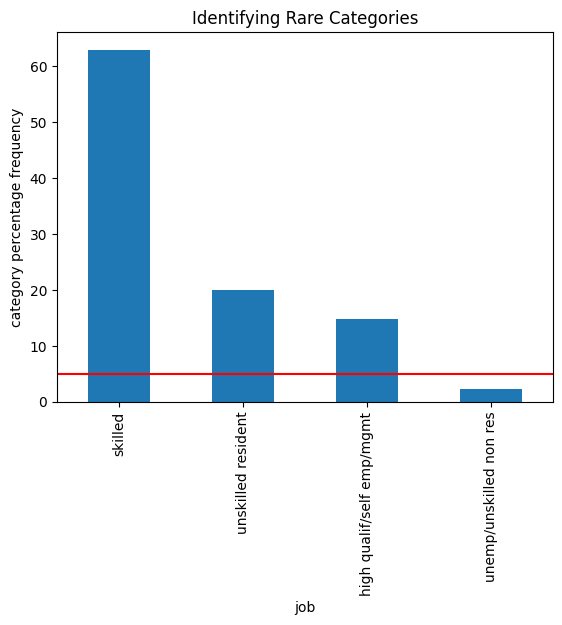

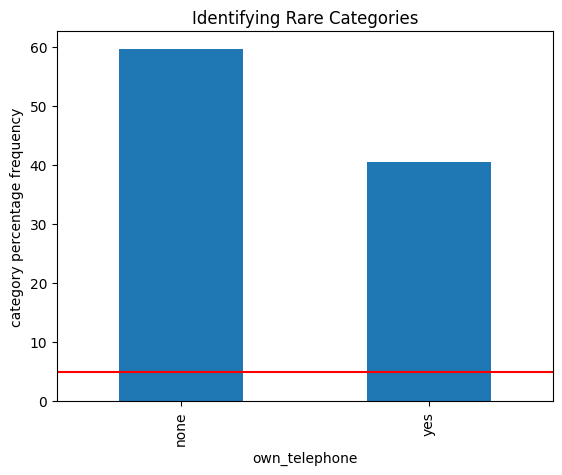

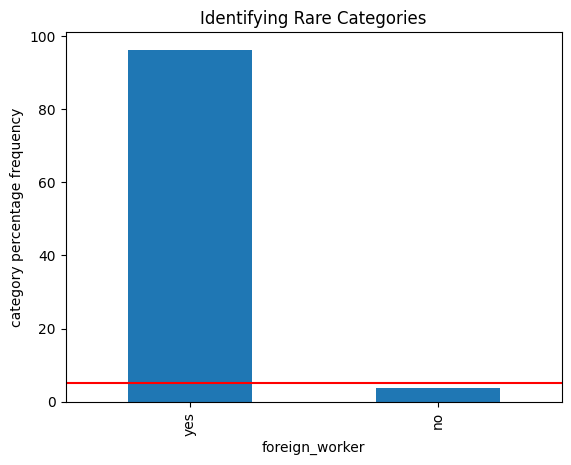

In [ ]:
for var in categorical:
  check_rare(var)

<font color = 'indianred'>**From the above graph, we can see that we need to do rare label emcoding for following variables: ``` 'credit_history',  'purpose',
 'savings_status',  'personal_status',  'other_parties', other_payment_plans', 'job'```**

#### <font color = 'shade'> **Check distribution of target variable**

In [ ]:
print(f"{100 * y.value_counts(normalize=True)} ")

good    70.0
bad     30.0
Name: class, dtype: float64 


From the above analysis, we can observe that 70% of the the data is classified as good credit risk and 30% of the data is classified as bad credit risk. <font color = 'indianred'>**We can see that the dataset is imbalanced** i.e. we have far more observation from one class or label. We will see how to address this issue later in the course.

### <font color = 'shade'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function in last lecture. We have added this function in python file eda_plots. We have imorted the function and will use it now.

#### <font color = 'shade'>**Distribution of continuous variables**

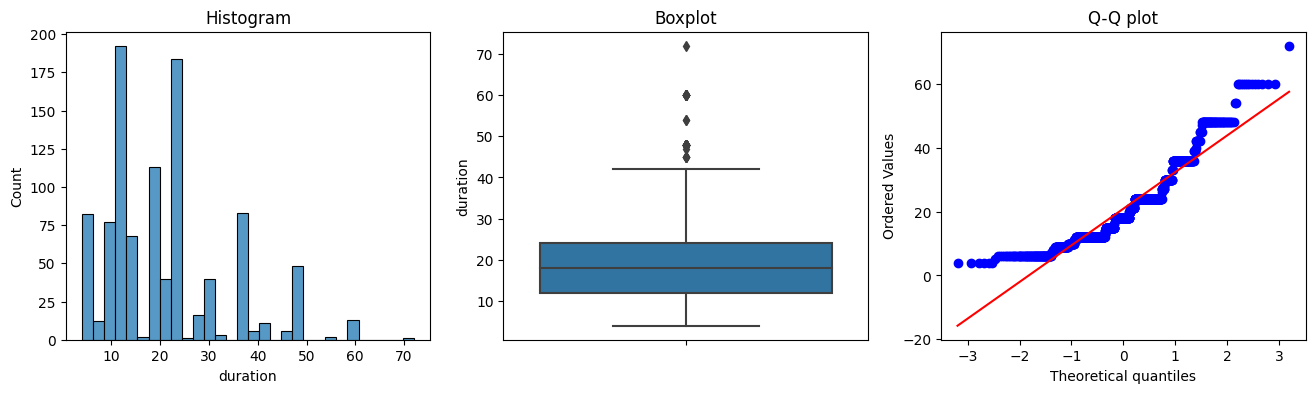

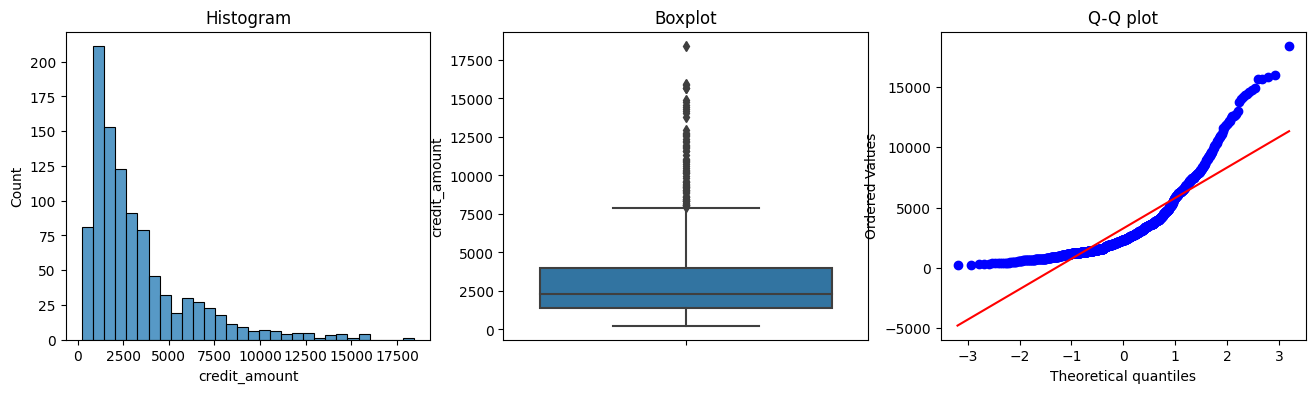

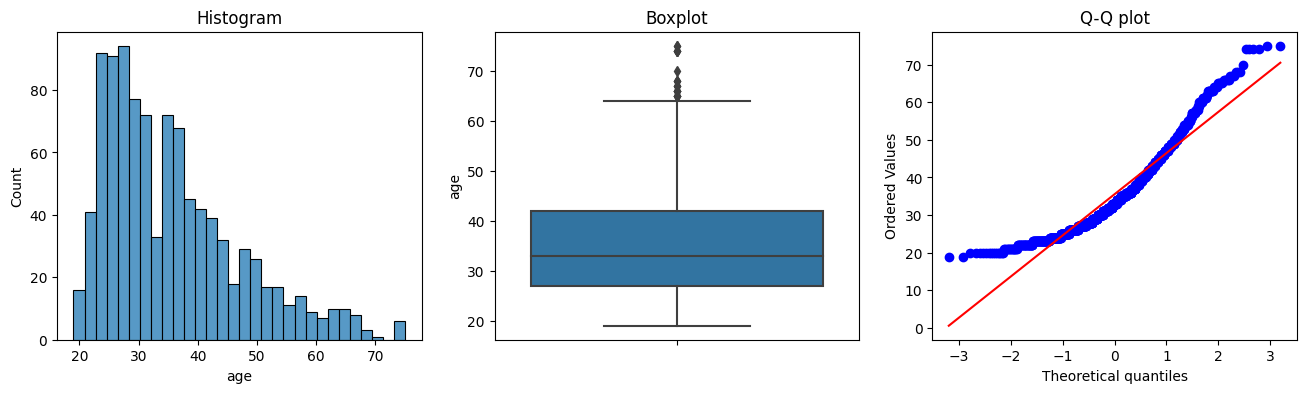

In [ ]:
for var in continuous:
    diagnostic_plots(X, var)

<font color ='indianred'>**All the three continuous variables are skewed. None of these variables have zero or negative values. We can use any of the following transformations - logartithmic, yeo-johnson or boxplot for these variabes.**


#### <font color = 'shade'>**Distribution of discrete variables**

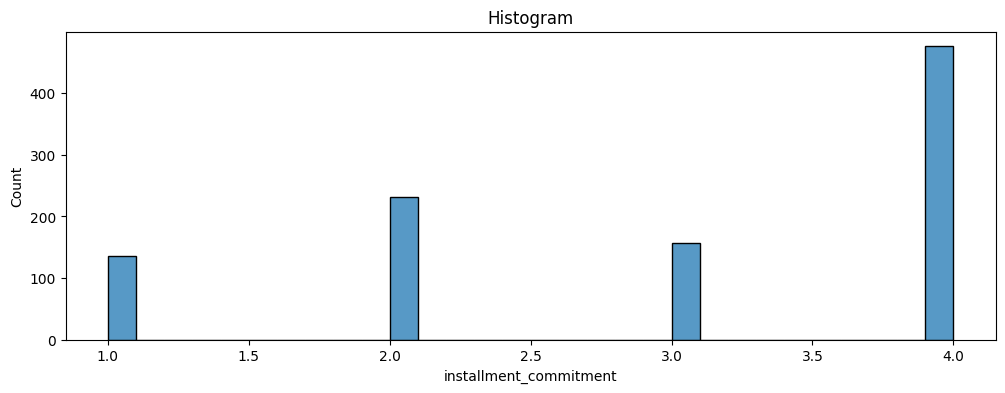

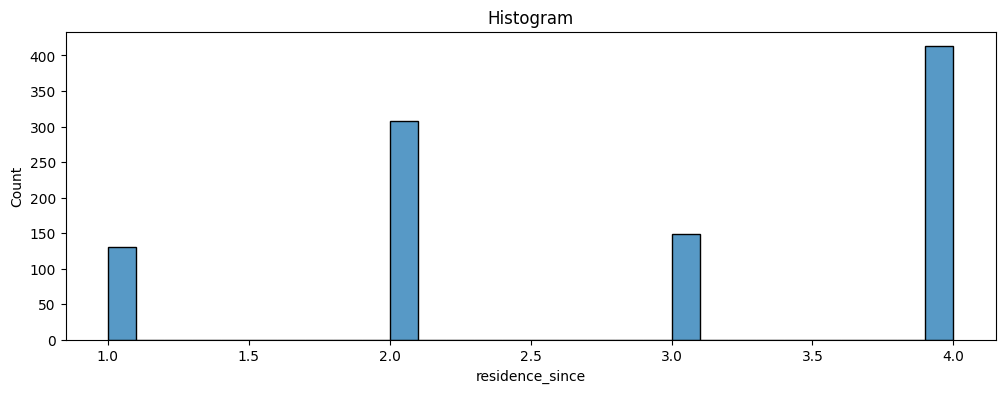

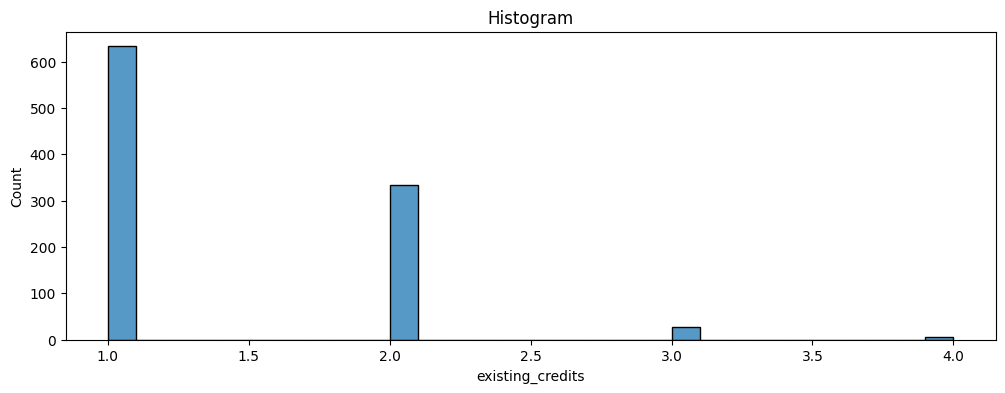

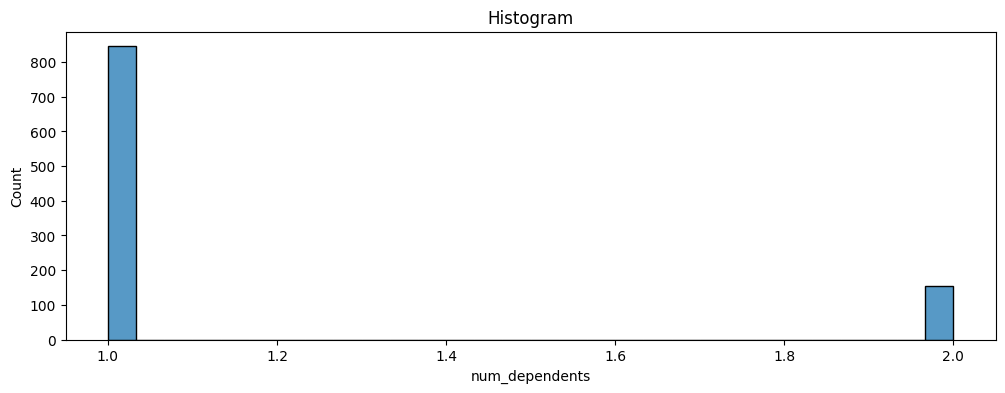

In [ ]:
# histograms for discrete variables
for var in discrete:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 1, 1)
    sns.histplot(X[var], bins=30)
    plt.title('Histogram')

<font color ='indianred'>From the above graphs, it seems that these variables were continuos varibles. These have allredy been have been discretized uisng equal width method.

## <font color = 'shade'>**Visualizing Relationships between variables**

### <font color = 'shade'>**Correlation Matrix**

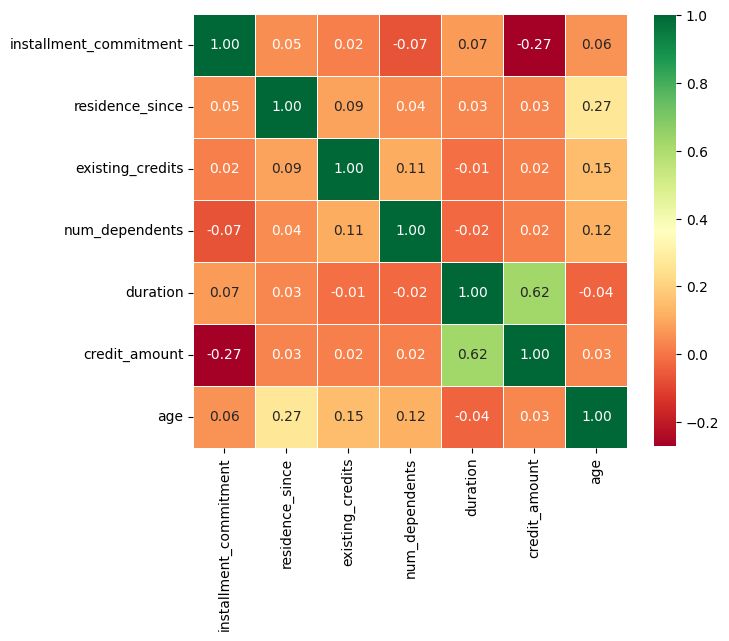

In [ ]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matrix
corrmat = X[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* None of the correlations are too high in this dataset.

### <font color = 'shade'>**Relationship between Target variable and categorical variables**

In [ ]:
df = pd.concat([X, y], axis = 1)

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.rename({'class': 'target'}, axis = 1, inplace=True)

In [ ]:
df['target'] = df['target'].map({'good':0, 'bad':1})

In [ ]:
df = df.astype({'target': 'int32'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,1
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,1


Now, let's plot a bar-plot of each categorical variable w.r.t. churn rate of each category.


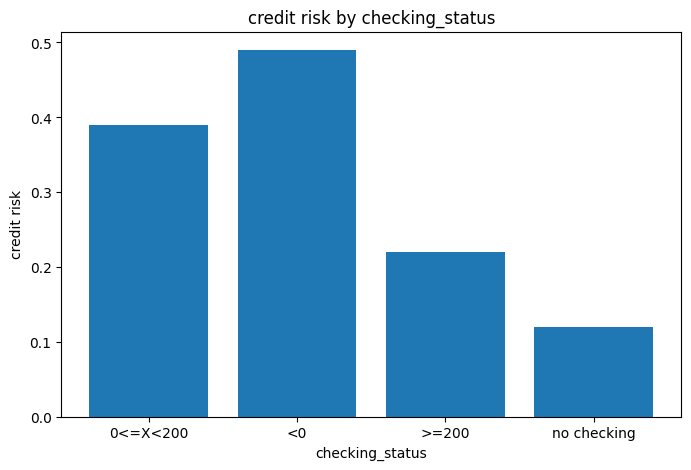

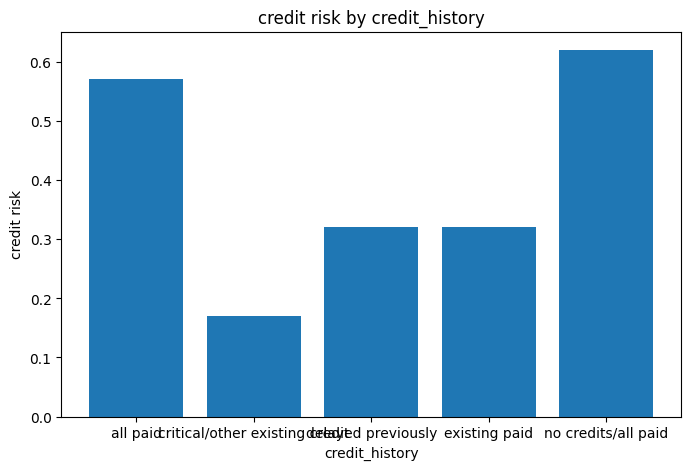

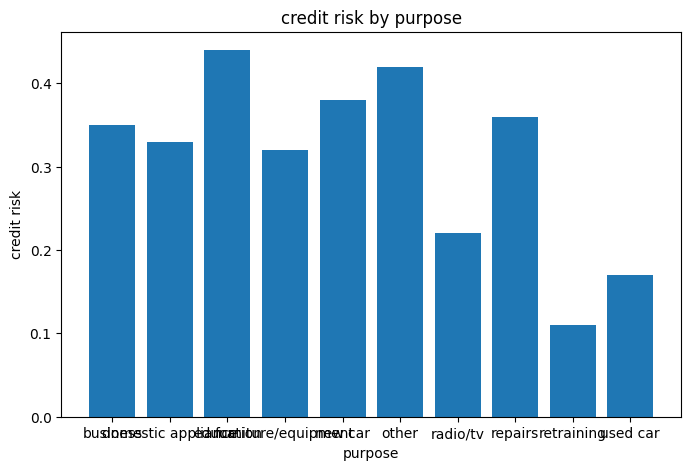

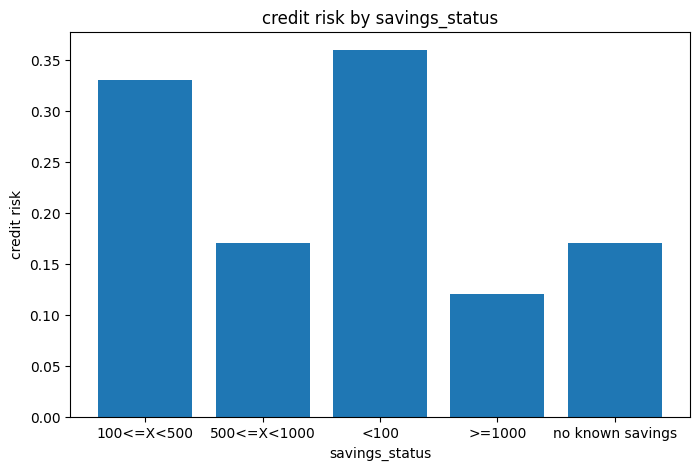

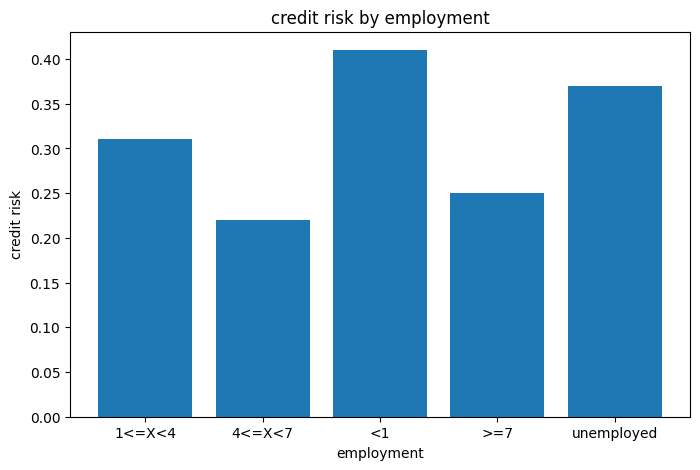

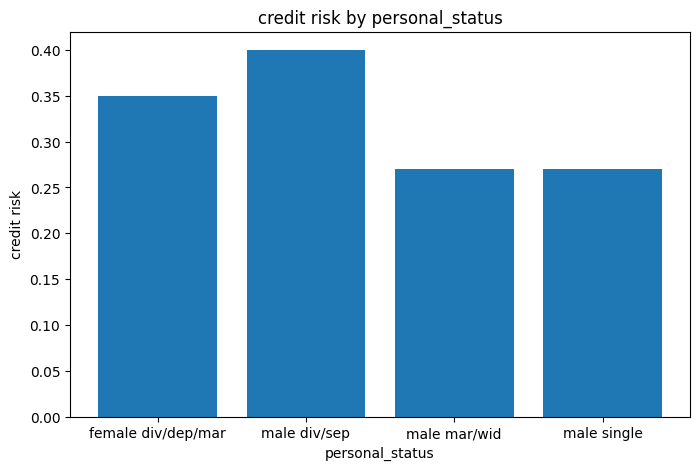

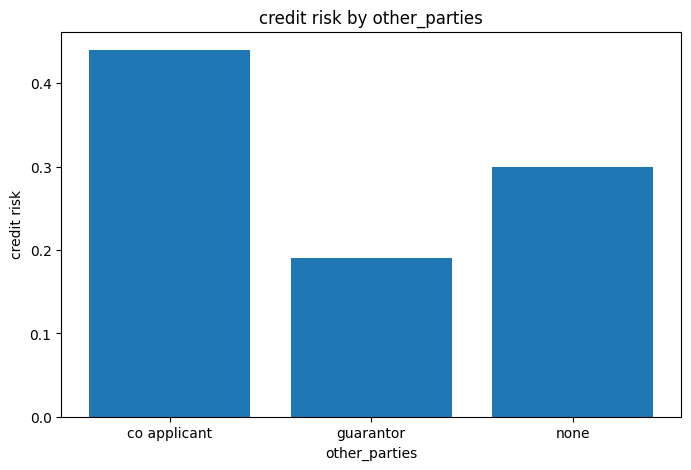

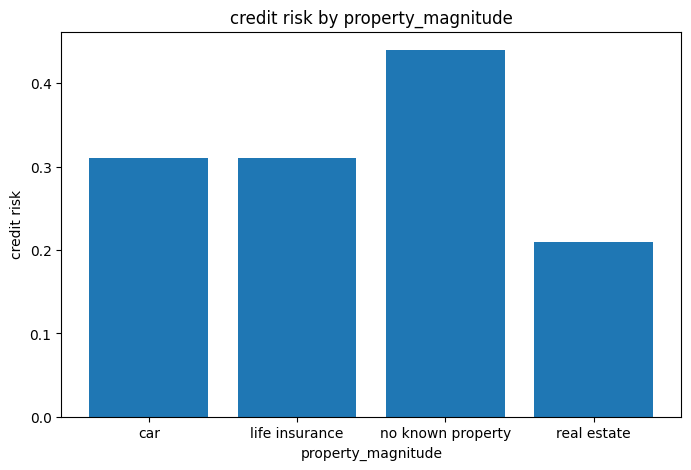

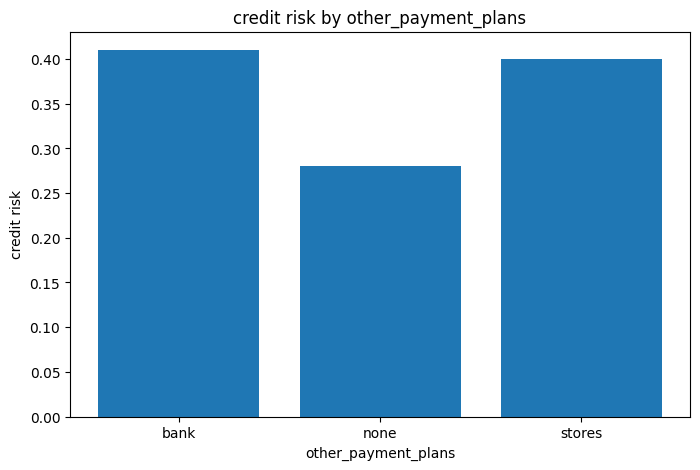

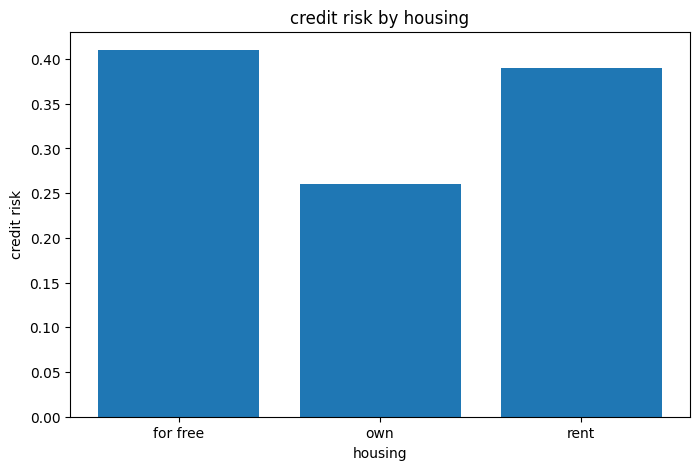

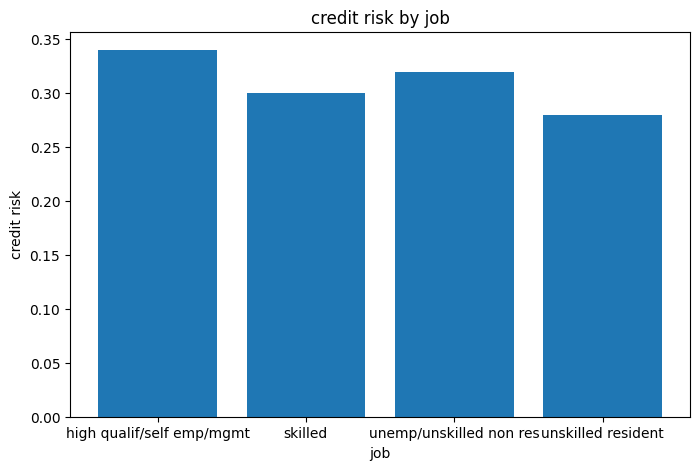

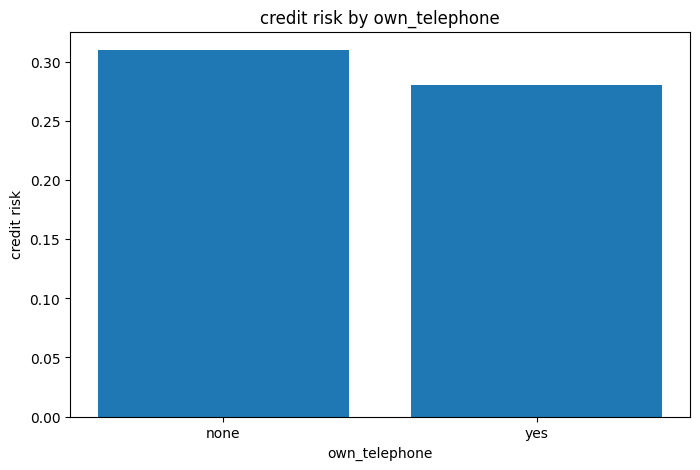

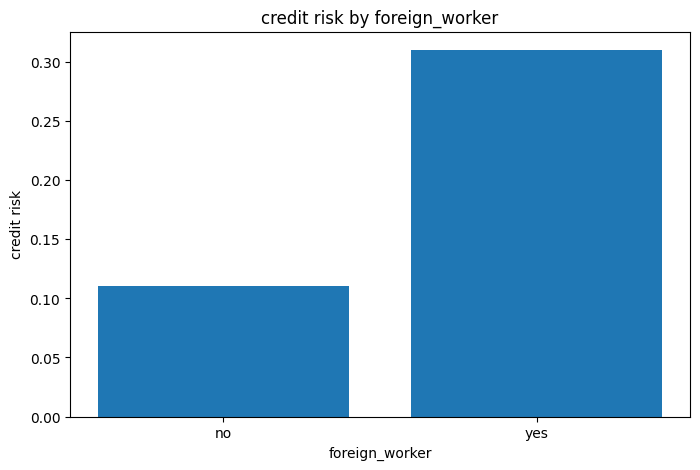

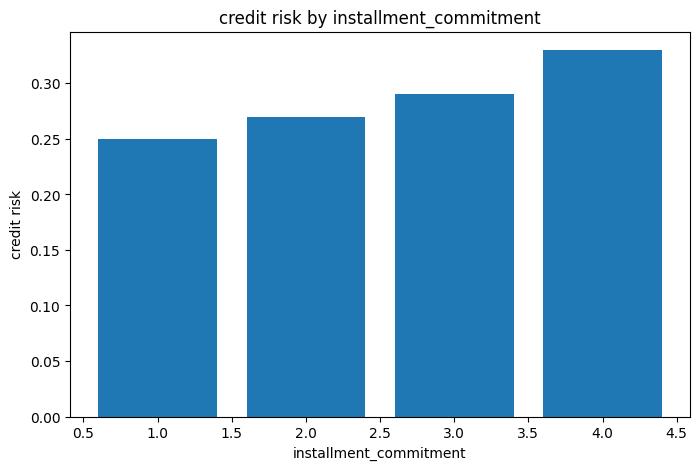

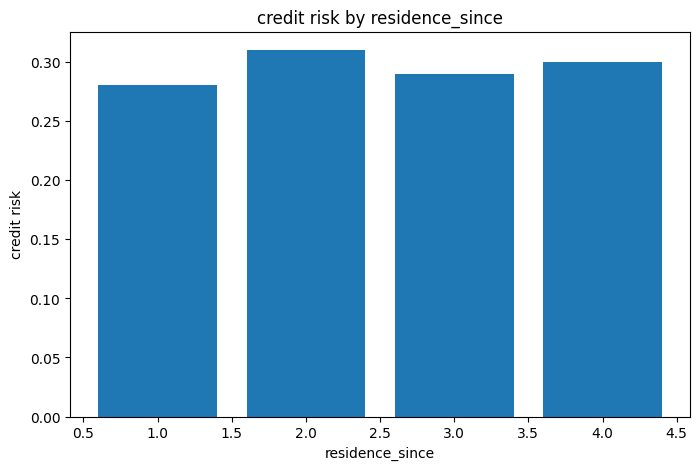

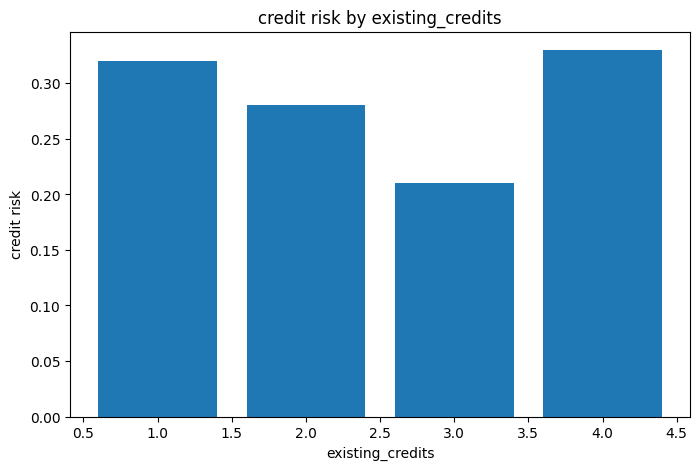

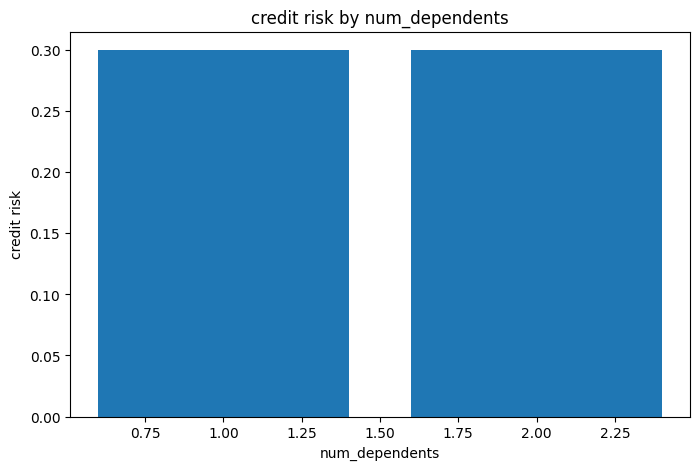

In [ ]:
# Plotting all categorical and discrete features using above function.
for category in categorical + discrete:
  plot_target_by_category(df, 'target',category,'credit risk')

# <font color = 'shade'>**Conclusion from EDA**</font>
## **Conclusions:**

1. We do not have any missing values or single value columns
2. We have categorical variables in the data frame that should be converted into numerical before we run our model. Hence we need to do encoding of categorical variables.
3. Further, we need to do rare label encoding for following variables: 'credit_history', 'purpose', 'savings_status', 'personal_status', 'other_parties', other_payment_plans', 'job'.
4. From distributions of age, duration and amount, we can see that all three of these variables are skewed. We need to do transformation (like logarithmic, boxplot or yeojohnson) for these variables.
5. From the graphs of discrete variables, it seems that these variables were continuos varibles. These have allredy been have been discretized uisng equal width method.
6. From the relationship between target variables and discrete variables - we can see that for certain variables the relationship is not monotonous. In this case onehot encoding or mean encoding/decision tree encoding might help.
6. Finally we will need to make sure that the continuos variables have same scale. We will need to do feature scaling for continuos variables and discrete variables (if we do mean encoding).

**Preprocessing Steps:**

Pipeline 1:

1. Rare label encoding for categorical .
2. One hot encoding for categorical + discrete variables
3. Log transformation for continuos variables
4. Scaling for continuous variables.

Pipeline 2:
Replace One hot enoding with Decision Tree encoding for categorical and discrete variables.



# <font color ='shade'>**Complete Pipeline**

## <font color ='shade'>**Split Data**

In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123, stratify =y)

In [ ]:
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
356,no checking,12.0,critical/other existing credit,radio/tv,2331.0,no known savings,>=7,1.0,male single,co applicant,4.0,real estate,49.0,none,own,1.0,skilled,1.0,yes,yes
344,>=200,10.0,existing paid,new car,3949.0,<100,<1,1.0,male single,guarantor,1.0,life insurance,37.0,none,own,1.0,unskilled resident,2.0,none,yes
236,0<=X<200,6.0,existing paid,new car,14555.0,no known savings,unemployed,1.0,male single,none,2.0,life insurance,23.0,none,own,1.0,unemp/unskilled non res,1.0,yes,yes
699,>=200,15.0,existing paid,education,1905.0,<100,>=7,4.0,male single,none,4.0,car,40.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes
424,0<=X<200,12.0,existing paid,furniture/equipment,2762.0,no known savings,>=7,1.0,female div/dep/mar,none,2.0,life insurance,25.0,bank,own,1.0,skilled,1.0,yes,yes


In [ ]:
y_train

356    good
344    good
236     bad
699    good
424     bad
       ... 
124     bad
923    good
362    good
217    good
200    good
Name: class, Length: 670, dtype: category
Categories (2, object): ['bad', 'good']

In [ ]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')

Length of X_train: 670
Length of X_test: 330


In [ ]:
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of y_train: 670
Length of y_test: 330


##  <font color ='shade'>**Pipeline 1**</font>

Create a pipeline with following steps:

1. 'rare_label_encoder', variables =  var_rare_labels
2. 'One_hot_encoding', variables= categorical+discrete,
3. 'log_transformer', variables = continuous
4. 'scalar',StandardScaler(), variables = continuous
5. 'convert_to_numpy', ConvertToNumpyArray(), all variables
5. KNeighborsClassifier())


In [ ]:
var_rare_labels= [
 'credit_history',
 'purpose',
 'savings_status',
 'personal_status',
 'other_parties',
 'other_payment_plans',
 'job',
]

In [ ]:
continuous

['duration', 'credit_amount', 'age']

In [ ]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

In [ ]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

## <font color ='shade'>**TASK1** - Create the pipeline using feature engine.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

In [ ]:
credit_risk_pipeline_1 = Pipeline([

    ('rare_label_encoder',
      RareLabelEncoder(variables=var_rare_labels,replace_with='Rare')),

    ('one_hot_encoder',
     OneHotEncoder(variables=categorical+discrete
                   ,drop_last= True, ignore_format=True)),

    ('log_transformer',
     LogTransformer(variables=continuous)),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(), variables = continuous)),

    ('convert_to_numpy', ConvertToNumpyArray()),

    ('knn',
      KNeighborsClassifier())
])

##  <font color ='shade'>**TASK2: Hyperparameter Tuning - Round 1**

In [ ]:
# You will now create the paramtyer grid and do gridsearch. You will only tune n_neighbors of KNeighborsClassifier.
param_grid_1 = {

    'knn__n_neighbors':np.arange(1,6,1)
}

# now we set up the grid search with cross-validation
grid_knn_1 = GridSearchCV(credit_risk_pipeline_1, param_grid_1,
                           cv=5, return_train_score= True)

In [ ]:
# fit the grid on training data
grid_knn_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['credit_history',
                                                                    'purpose',
                                                                    'savings_status',
                                                                    'personal_status',
                                                                    'other_parties',
                                                                    'other_payment_plans',
                                                                    'job'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employ...
                                                                 'num_dependents'])),
                                       ('log_transformer',
                                        LogTransformer(variables=['duration',
                                                                  'credit_amount',
                                                                  'age'])),
                                       ('scalar',
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['duration',
                                                                             'credit_amount',
                                                                             'age'])),
                                       ('convert_to_numpy',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([1, 2, 3, 4, 5])},
             return_train_score=True)

In [ ]:
# check the best_parameters from GridSearchCv for your model
print(grid_knn_1.best_params_)

{'knn__n_neighbors': 5}


In [ ]:
# Here  save_model_folder is folder where I have saved models. Change that to appropriate location.
# This variable is defined in section Mount Google Drive, Import Data

# specify the file to save the best estimator
file_best_estimator_round1 = save_model_folder / 'knn_round1_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round1 = save_model_folder / 'knn_round1_complete_grid.pkl'

In [ ]:
# save the best estimator
joblib.dump(grid_knn_1.best_estimator_, file_best_estimator_round1)

# save complete grid results
joblib.dump(grid_knn_1, file_complete_grid_round1)

['/content/drive/MyDrive/AML/data/models/ml_fall_2023/knn_round1_complete_grid.pkl']

In [ ]:
# load  the best estimator
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)

# load complete grid results
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

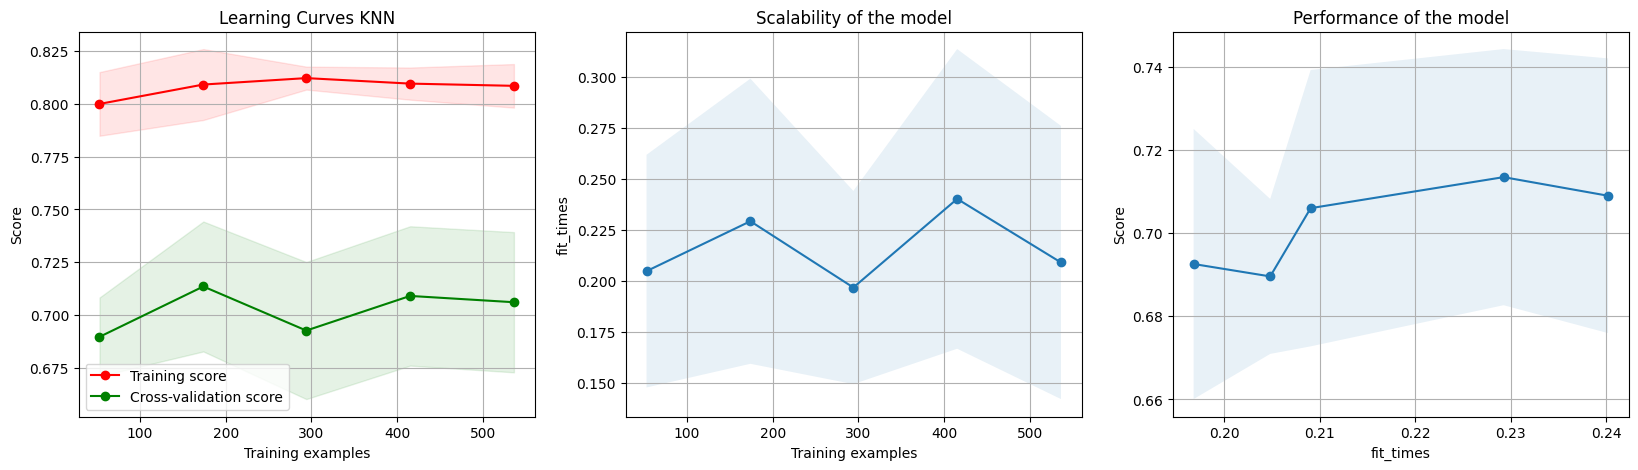

In [ ]:
# plot learning curves
# Notice that we are using the best estimator
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

In [ ]:
# Check the train scores
# to check the train scores we will use loaded best estinator

print(loaded_best_estimator_round1.score(X_train,y_train))

# check the cross validation score
# To check the cross validation score we need to use the loaded complete grid results

print(loaded_complete_grid_round1 .best_score_)

0.8
0.7059701492537314


- **Conclusions from Learning curves**

- The training and test scores are not that far apart. There is no sign of underfitting since scores on both training and testing are good. There might be some overfitting, but chances are low as there is a difference of only 0.1 in the train and test scores. We can check with the next round with higher n_neighbors values to confirm this.

**What would be the next steps?**
- If the model is underfitting then we do not need round 2. This is because if it is underfitting then we need to increase model complexity. Since we are using n_neighbors from 1 to 5 (both included), we cannot increase model complexity further.
- If model is overfitting then specify higher ranges of n_neighbors. Use values of n_neighbors from 6 to 20 in next round


##  <font color ='shade'>**Task3: Hyperparameter Tuning - Round 2**


/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

{'knn__n_neighbors': 10}


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

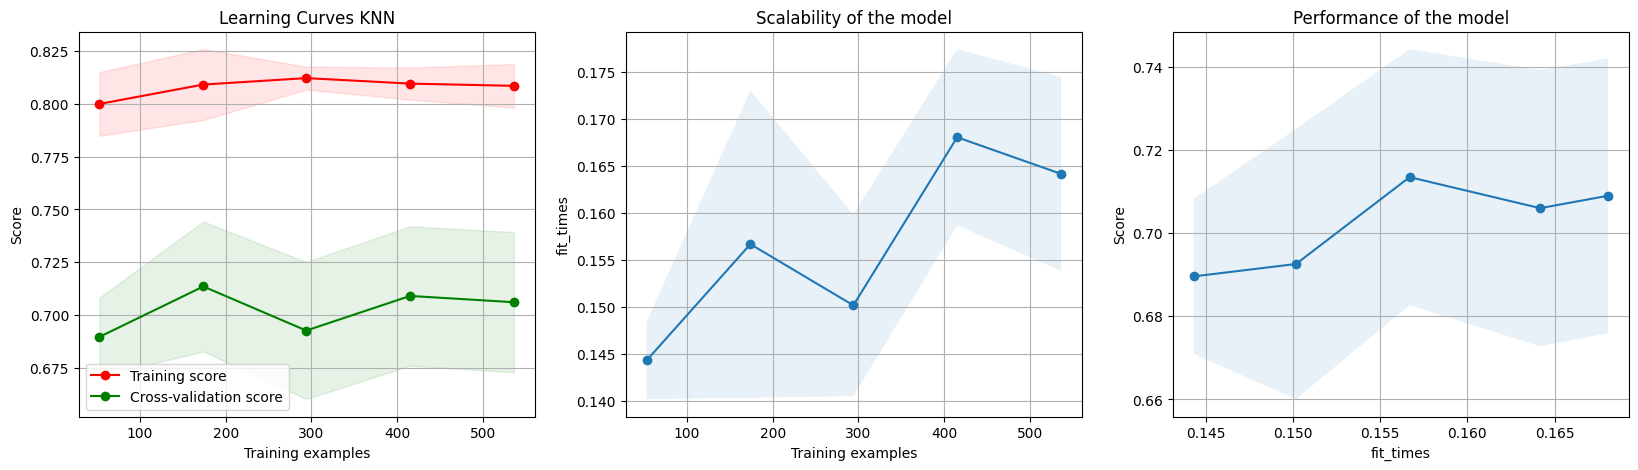

In [ ]:
param_grid_2 = {

    'knn__n_neighbors':np.arange(6,20,1)
}

# now we set up the grid search with cross-validation
grid_knn_2 = GridSearchCV(credit_risk_pipeline_1, param_grid_2,
                           cv=5, return_train_score= True)

grid_knn_2.fit(X_train, y_train)

print(grid_knn_2.best_params_)

file_best_estimator_round2 = save_model_folder / 'knn_round2_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round2 = save_model_folder / 'knn_round2_complete_grid.pkl'

joblib.dump(grid_knn_2.best_estimator_, file_best_estimator_round2)

# save complete grid results
joblib.dump(grid_knn_2, file_complete_grid_round2)

loaded_best_estimator_round2 = joblib.load(file_best_estimator_round1)

# load complete grid results
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round1)

plot_learning_curve(loaded_best_estimator_round2, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

In [ ]:
print(loaded_complete_grid_round2 .best_score_)

0.7059701492537314


<font color ='red'>**Round 2 conclusion**
- As we can see, the train and test scores have not differed. The model was not overfitting in round 1. We can go ahead with the first model itself.

##  <font color ='shade'>**Task4: Pipeline2**</font>

In this round, we will use a different pipeline. Create a pipeline with following steps:

1. 'rare_label_encoder' for categorical variables
2. 'DecisionTree_Encoder_encoder', variables= categorical+discrete,
3. 'log_transformer', variables = continuous
4. 'scalar',StandardScaler(), variables = continuous
5. 'convert_to_numpy', ConvertToNumpyArray(), all variables
6. KNeighborsClassifier())





##  <font color ='shade'>**Pipeline2**

In [ ]:
from sklearn.preprocessing import LabelEncoder


y_encode = LabelEncoder()
y_train_encoded = y_encode.fit_transform(y_train)
y_test_encoded= y_encode.transform(y_test)
credit_risk_pipeline_2 = Pipeline([

    ('rare_label_encoder',
      RareLabelEncoder(variables=categorical,replace_with='Rare')),

    ('decision_tree_encoder',
      DecisionTreeEncoder(random_state=123,
                    variables=discrete+categorical,
                    encoding_method = 'ordered',
                    regression = False,
                    scoring = 'accuracy',
                    ignore_format=True,
                    )),

    ('log_transformer',
     LogTransformer(variables=continuous)),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(), variables = continuous)),

    ('convert_to_numpy', ConvertToNumpyArray()),

    ('knn',
      KNeighborsClassifier())
])

##  <font color ='shade'>**Task5: Hyperparameter Tuning - Round 3**
- Repeat all the steps of round 1. **Again only tune n_neighbors**. Use values in the range (1, 10). Use step size of 1.
- Report your conclusion from this round.

In [ ]:
param_grid_3 = {

    'knn__n_neighbors':np.arange(1,10,1)
}

# now we set up the grid search with cross-validation
grid_knn_3 = GridSearchCV(credit_risk_pipeline_2, param_grid_3,
                           cv=5, return_train_score= True)

In [ ]:
print(y_train_encoded.shape)
print(y_train.shape)
print(y_test_encoded.shape)
print(y_test.shape)

(670,)
(670,)
(330,)
(330,)


In [ ]:
grid_knn_3.fit(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable checking_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['checking_status',
                                                                    'credit_history',
                                                                    'purpose',
                                                                    'savings_status',
                                                                    'employment',
                                                                    'personal_status',
                                                                    'other_parties',
                                                                    'property_magnitude',
                                                                    'other_payment_plans',
                                                                    'housing',
                                                                    'job',
                                                                    'own_telephone',
                                                                    'foreign_worker'])),
                                       ('decision_tree_encoder',
                                        DecisionTreeEncoder(encodin...
                                       ('log_transformer',
                                        LogTransformer(variables=['duration',
                                                                  'credit_amount',
                                                                  'age'])),
                                       ('scalar',
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['duration',
                                                                             'credit_amount',
                                                                             'age'])),
                                       ('convert_to_numpy',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [ ]:
print(grid_knn_3.best_params_)

{'knn__n_neighbors': 9}


In [ ]:
# specify the file to save the best estimator
file_best_estimator_round3 = save_model_folder / 'knn_round3_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round3 = save_model_folder / 'knn_round3_complete_grid.pkl'

In [ ]:
# save the best estimator
joblib.dump(grid_knn_3.best_estimator_, file_best_estimator_round3)

# save complete grid results
joblib.dump(grid_knn_3, file_complete_grid_round3)

['/content/drive/MyDrive/AML/data/models/ml_fall_2023/knn_round3_complete_grid.pkl']

In [ ]:
# load  the best estimator
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)

# load complete grid results
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

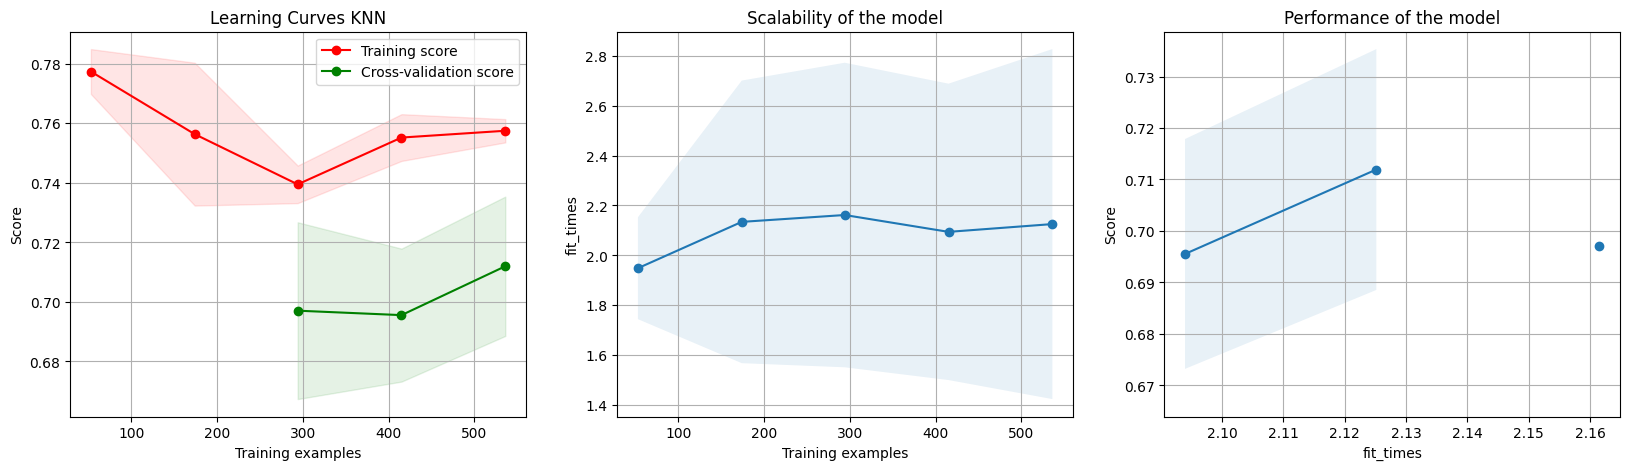

In [ ]:
# plot learning curves
# Notice that we are using the best estimator
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves KNN', X_train, y_train_encoded, n_jobs=-1)

In [ ]:
# Check the train scores
# to check the train scores we will use loaded best estinator

print(loaded_best_estimator_round3.score(X_train,y_train_encoded))

# check the cross validation score
# To check the cross validation score we need to use the loaded complete grid results

print(loaded_complete_grid_round3.best_score_)

0.7626865671641792
0.7119402985074627


#  <font color ='shade'>**Task6: Perfromnace on Test Data**

In [ ]:
# check the test scores for final model
# Compare the cross validation score of round1, round2, and round3.
# Whichever round has best cross validation score, use the best estimator from that round to predict the test scores
print(f'Test data accauracy for round 1 :{loaded_best_estimator_round1.score(X_test,y_test)}')
print(f'Test data accauracy for round 2: {loaded_best_estimator_round2.score(X_test,y_test)}')
print(f'Test data accauracy for round 3: {loaded_best_estimator_round3.score(X_test,y_test_encoded)}')

Test data accauracy for round 1 :0.693939393939394
Test data accauracy for round 2: 0.693939393939394
Test data accauracy for round 3: 0.7212121212121212


In [ ]:
print(y_test_encoded[0:5])
print(y_test[0:5])

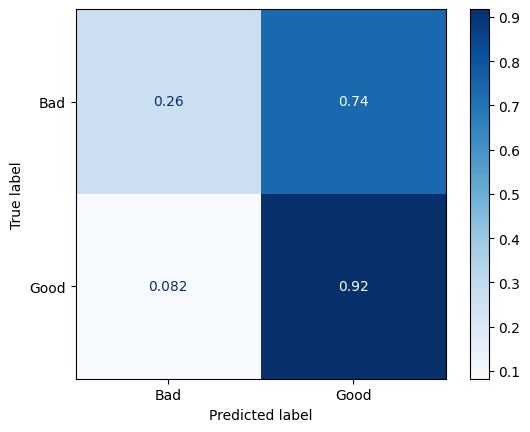

In [ ]:
# use the best estimator selected in previous step to plot the confusion matrix
# CODE HERE
ConfusionMatrixDisplay.from_estimator(loaded_best_estimator_round3, X_test, y_test_encoded,
                                 display_labels=['Bad', 'Good'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

In [ ]:
uniques, counts = np.unique(y_train, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(y_train)))
print(percentages)

{'bad': 30.0, 'good': 70.0}



<font size=6><br>**CONCLUSION:**
- From the confusion matrix, we can see that there are a lot of false positives. The model is incorrectly predicting 'Good' for 'Bad' 74% of the time.
This could be due to the presence of more Good target variables than Bad in the training dataset. We can balance the dataset, or use a probablistic model.
- The model predicts Good credit holders correctly 73% of the time.
- The model needs to be improved to remove the bias towards 'Good' credit.
- Overall, the accuracy of the 3rd model is the highest with n_neighbors=9 and decision tree encoding instead of one hot encoding.